# Titanic exploration

This Notebook is about the clasic kaggle titanic data set. Working with this data I will trying to extract some meaning. Part of the notebook will be a **Data exploration analysis** and at the end I will add some Machine Learning using **Logistic regresion**. 

The objective is to extract meaning and answer son basic questions like:
- Number of people Survived
- Number of male and famale
- The age of the passengers
- Price of the fires
- and much more..

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### The Data
In this part we will try to understand the data and see how is organized.

In [68]:
titanic = pd.read_csv('data/titanic_train.csv')

In [69]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As we can see in the in the information above we have 12 columns and 891 rows. There are some columns are ease to understand like sex, Name or age, but other its difucult to figure out the meaning like SibSp, Pclass or Parch. 

Lets keep going and see if we can understand the data. 

In [70]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [72]:
columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

definition = ['The passenger ID', 'Survived 0 = No, 1 = Yes',
              'Ticket class. 1 = 1st, 2 = 2nd, 3 = 3rd', 'Name', 'Sex/gender', 'Age in years', 'Number of siblings or spouses aboard the Titanic',
             'Number of parents or children aboard the Titanic', 'Ticket number', 'Passenger fare', 'Cabin number', 
             'Port of Embarkation. C = Cherbourg, Q = Queenstown, S = Southampton']


columns_def = pd.DataFrame({'Columns': columns, 
                           'Definition':definition})

In [73]:
columns_def.set_index('Columns')

,Definition
Columns,
PassengerId,The passenger ID
Survived,"Survived 0 = No, 1 = Yes"
Pclass,"Ticket class. 1 = 1st, 2 = 2nd, 3 = 3rd"
Name,Name
Sex,Sex/gender
Age,Age in years
SibSp,Number of siblings or spouses aboard the Titanic
Parch,Number of parents or children aboard the Titanic
Ticket,Ticket number


Now we can begin to understand the data wit te information above and start with our Data exploration analysis.

# Exploratory Data Analysis

## Missing Data

First lets see if we have missing data. We have to much rows in this data set so it will be a good idea to explore it with a plot

Text(0.5, 1, 'Looking for the missing data')

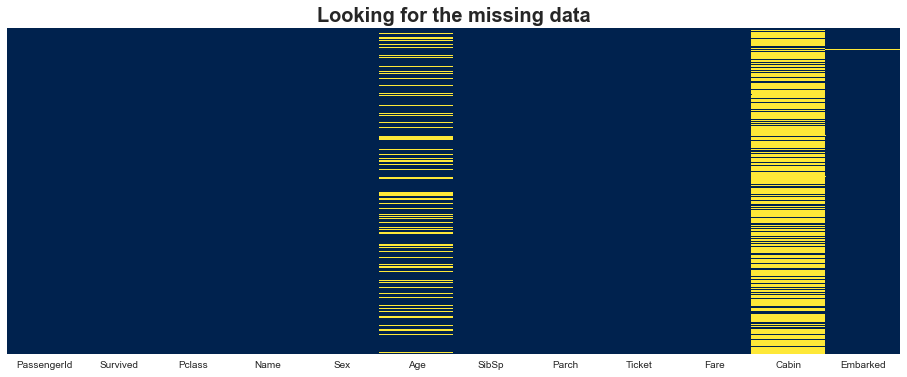

In [74]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='cividis')

# Customizing
ax.set_title('Looking for the missing data', fontsize=20, fontweight='bold')

As we can see in the **Looking for the missing data**, there a lot of data missing in Age and Cabin columns and we only have 1 or 2 missing data in Embarked. 

This give us an Idea of all the information we have just lookin the plot. 

Now lets, see the number of people that **survived (0)** and the number of people that **didn't survived(1)**. 

Text(0, 0.5, 'Survived')

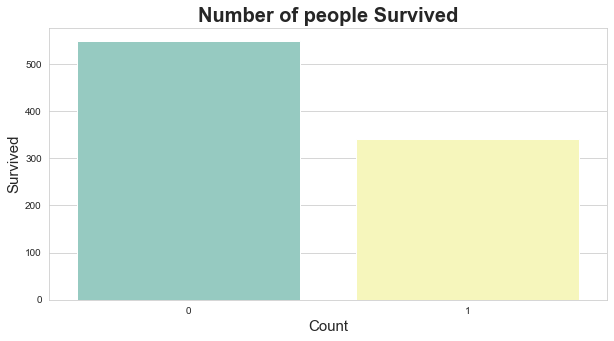

In [75]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='Survived', data=titanic, palette='Set3')

# Customizing
ax.set_title('Number of people Survived', fontsize=20, fontweight='bold')
ax.set_xlabel('Count', fontsize=15)
ax.set_ylabel('Survived', fontsize=15)

# Explain what mean 0 and what mean 1

The plot give us an idea of the number of survial an not survival, but what if we want the exact number?

In [76]:
titanic[ titanic['Survived'] == 0].count()

PassengerId    549
Survived       549
Pclass         549
Name           549
Sex            549
Age            424
SibSp          549
Parch          549
Ticket         549
Fare           549
Cabin           68
Embarked       549
dtype: int64

In [77]:
titanic[ titanic['Survived'] == 1].count()

PassengerId    342
Survived       342
Pclass         342
Name           342
Sex            342
Age            290
SibSp          342
Parch          342
Ticket         342
Fare           342
Cabin          136
Embarked       340
dtype: int64

**Now we can say that 549 peoplo did not survived and 342 people Survived**

Now lets divide the data by Sex and see the number of male and female  survived and not survived with just a plot. 

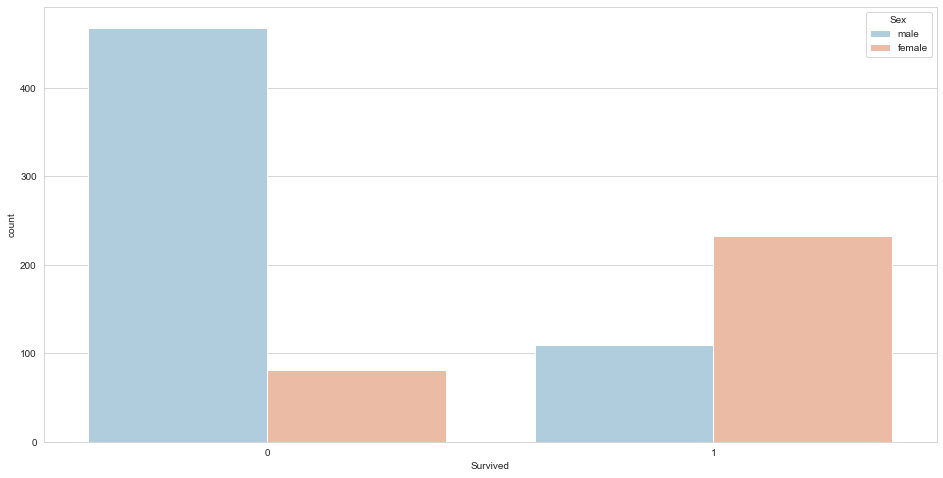

In [78]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=titanic, palette='RdBu_r')

**As we can see more men died in the titanic compared with the women.**

Let's continue with the exploration and split the data plot by Pclas and see if there are any relation between the Pclass and people who died. 

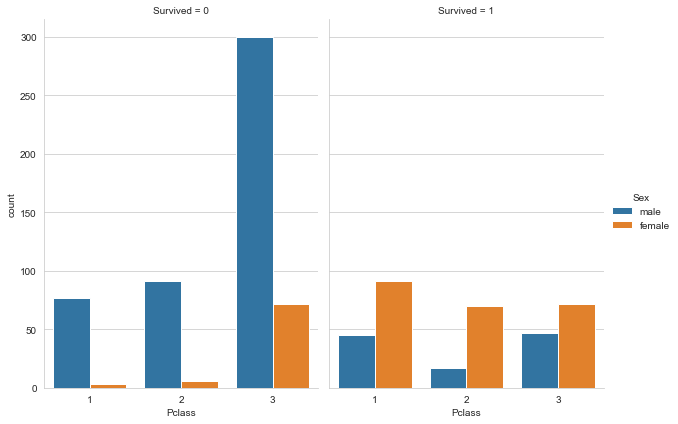

In [79]:
sns.catplot(x="Pclass", hue="Sex", col="Survived",
                data=titanic, kind="count",
                height=6, aspect=.7);

**As we can see in the plot above people in the third class of the boat have less lucky and suffer the most.**

Now lets explore the age column, and see in one plot the ages of the titanic passengers.

Text(0, 0.5, 'Frequency')

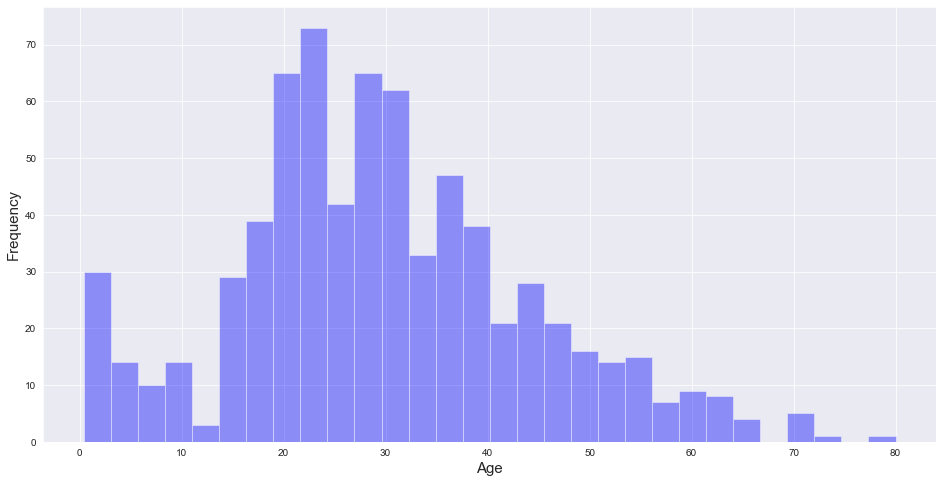

In [80]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(16, 8))
sns.distplot(titanic['Age'].dropna(),kde=False, color='blue', bins=30)

# Customizing
#ax.set_title('Number of people Survived', fontsize=20, fontweight='bold')
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)

**The Histrogram above tell us that we have more people between the 20's and 30's. Young people.**

In the next plot we're going to see the relations between the people in the titanic.

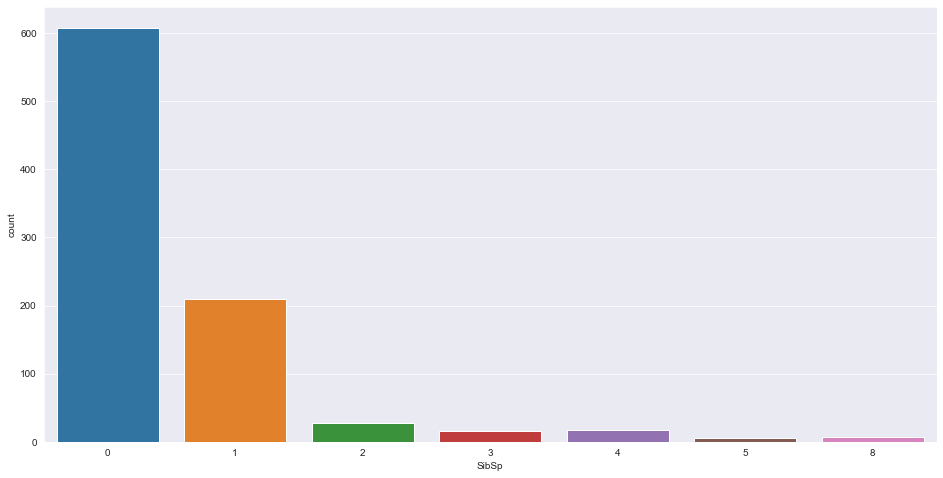

In [81]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.countplot(x='SibSp', data=titanic)

The plot above tell us the number of sibiling or spouse. So we can say that much of the people aboard have 0 sibiling/spouse aboard and they don't loose anyone.

**Now lets talk about the Fire Price**

Text(0, 0.5, 'Frequency')

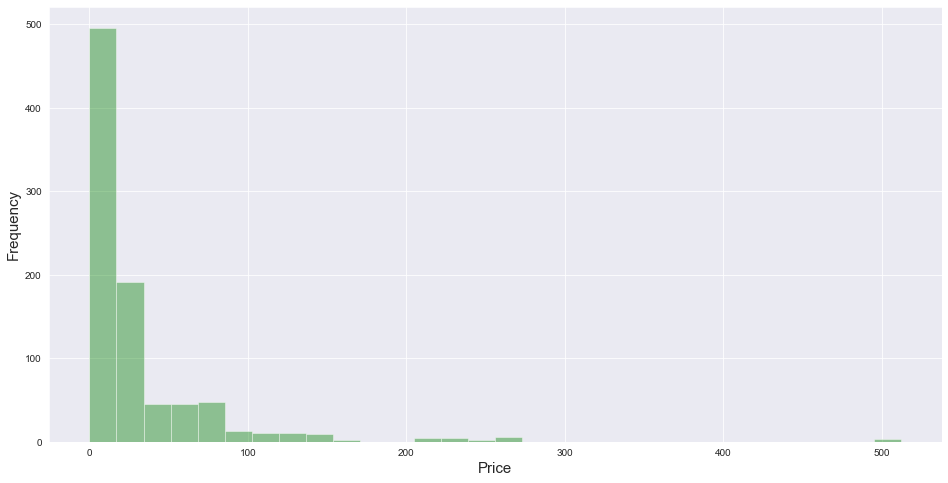

In [82]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.distplot(titanic['Fare'].dropna(),kde=False, color='green', bins=30)

# Customizing
#ax.set_title('Number of people Survived', fontsize=20, fontweight='bold')
ax.set_xlabel('Price', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)

We have youn people aboard as a majority, young people does not have much mony soo in the plot above we see that people bougth cheap fare.

That tell us that there must be a correlation between the Age and the Fare, lets see if is true.

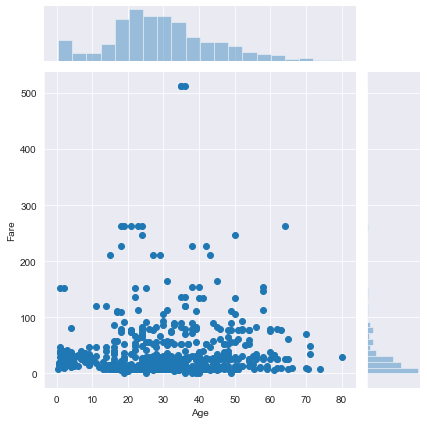

In [83]:
sns.jointplot(x='Age', y='Fare', data=titanic, kind='scatter')

mmm the Age doesn't matter soo much as I was thinking at the begining.

C:\Users\Richard\Desktop\ml_course\env\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Richard\Desktop\ml_course\env\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


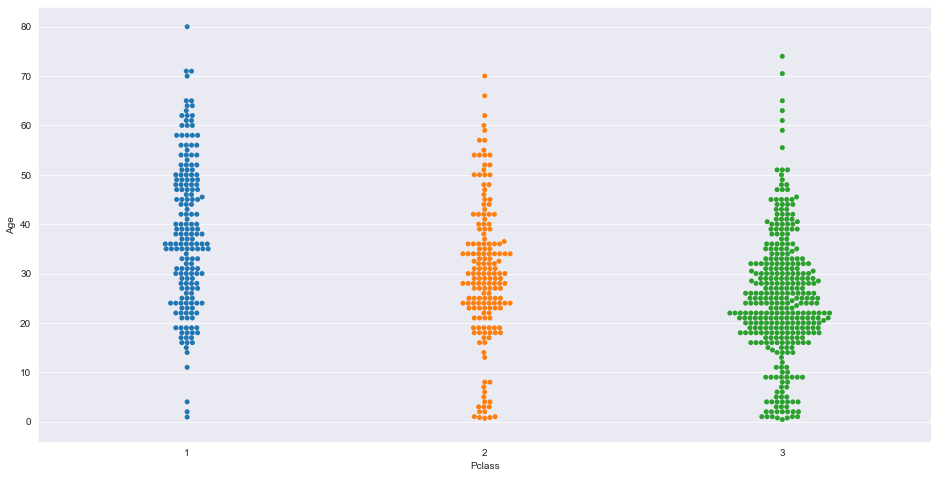

In [57]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.swarmplot(x='Pclass', y='Age', data=titanic)

The plot above is beautifull but I steel can't figure out the meaning... Let's say that we have more people in the third class and the are young between 20's and 30's. 

**Now lets see the correlation between all the columns we have in the data and see if we can understand it better.**

In [84]:
titanic_corr = titanic.corr()

In [85]:
titanic_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


It will be easier if we see it in a PLot

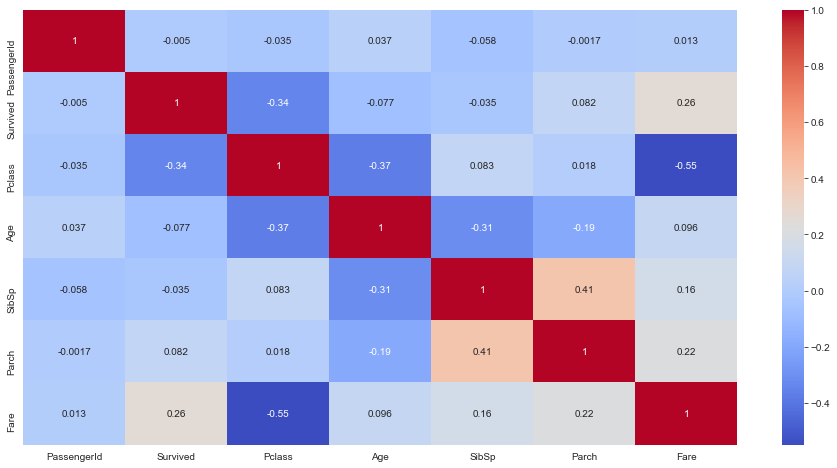

In [86]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(titanic_corr, cmap='coolwarm', annot=True)

As we can se there is not much correlation between columns. Just a little with Survived-Fare, and Parch-SibSp

One interesting thing will be to see the ages between male and famale. Let see it  with a plot. 

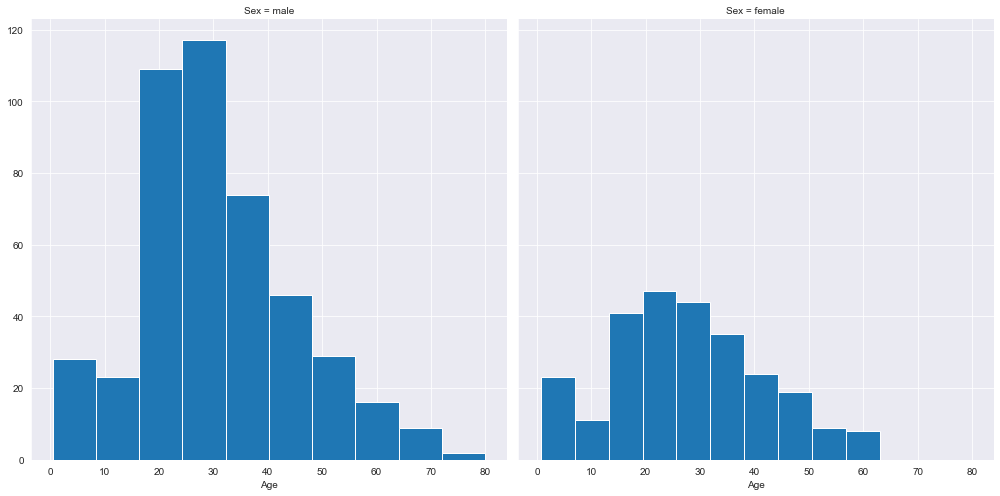

In [87]:
g = sns.FacetGrid(titanic, col='Sex', height=7)
g = g.map(plt.hist, 'Age')

Now lets clean the data and see if we can apply some ML stuff.

## Data cleaning

We have some missing data in some columns, so we can do two things fil the missing data applying some criteria or delete columns/row with the missing data.

Lets see what we can do

**First we are gona explore the Age column**

Text(0, 0.5, 'Age')

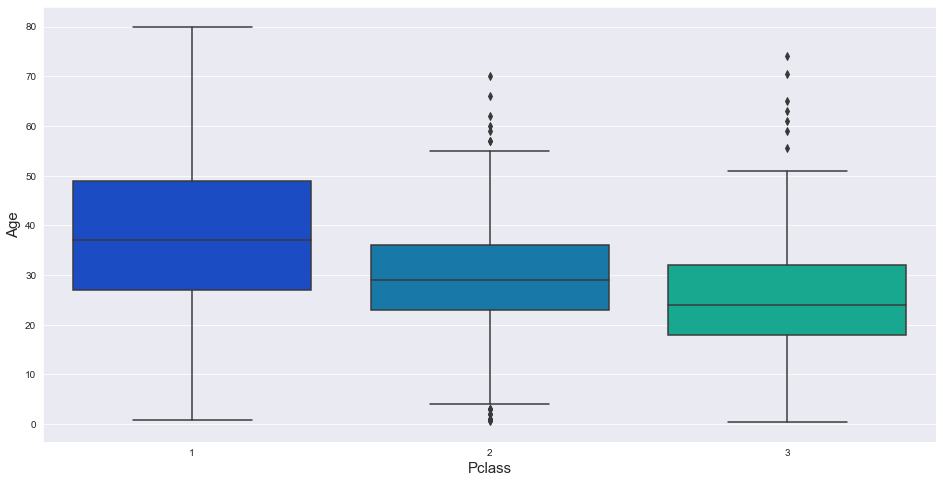

In [88]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(x='Pclass', y='Age', data=titanic, palette='winter')

# Customizing
#ax.set_title('Number of people Survived', fontsize=20, fontweight='bold')
ax.set_xlabel('Pclass', fontsize=15)
ax.set_ylabel('Age', fontsize=15)

With the Plot above we can figure out the avarange Age in any Pclass. Now we can replace de missing data in the Age column with the mean in any class to do some kind of aproximation. 

Lets say if you belong to the First class you age will be **around 37**, if you belong to the Second class you age will be **around 29** and if you belong to the third class you age will be **around 24.**

In [89]:
# Creation of the function that will appy or criteria
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age


In [90]:
# Applying the function we created in the Age column to fill the missing data
titanic['Age'] = titanic[['Age', 'Pclass']].apply(impute_age, axis=1)

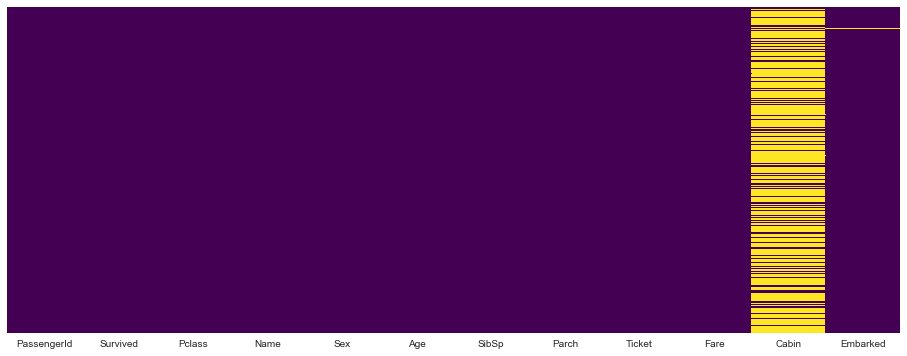

In [91]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

As we can see now, we don't have any missing data in the columns Age.  

Now lets aproach the Cabin columns. What we can do with this column?

We decided that it we be a good Idea to drop the column, becouse there is a lot of missing data.

In [92]:
titanic.drop('Cabin', axis=1, inplace=True)

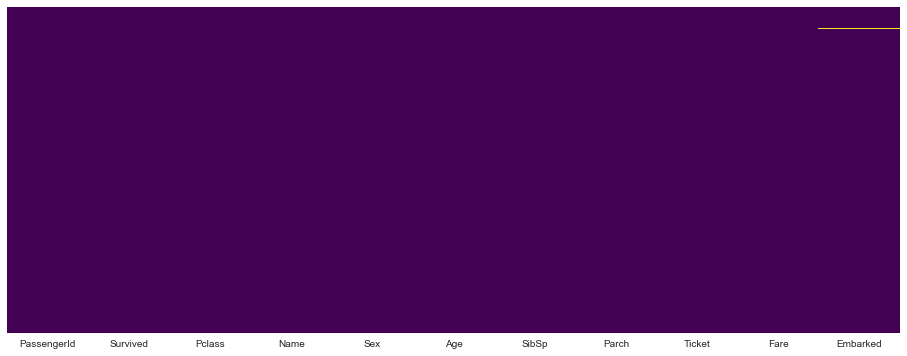

In [94]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

There is no Cabin column anymore.

Lets work with Embarked now.

This is simple, we are going to delete only the rows without fear of losing much information. 

In [95]:
titanic.dropna(inplace=True)

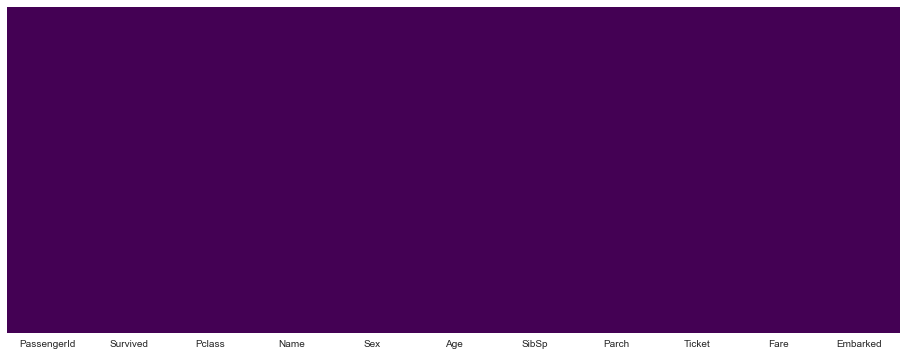

In [96]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

**Now the Data is clean and Lets get to the next Chapter!**

# Preparing data for Logistic Regresion

In [97]:
titanic_test = titanic.copy()

In [98]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [100]:
titanic_test.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


We need to convert the categorical data we need like Sex or Embarket to dummy variables (0 or 1). We need numerical information to apply the logistic regession 

In [101]:
sex = pd.get_dummies(titanic_test['Sex'], drop_first=True)

In [102]:
titanic_test['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 889, dtype: object

In [103]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [104]:
embark = pd.get_dummies(titanic_test['Embarked'], drop_first=True)

In [105]:
titanic_test['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 889, dtype: object

In [107]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [108]:
titanic_test.drop('PassengerId', axis=1, inplace=True)

In [110]:
titanic_test = pd.concat([titanic_test, sex, embark], axis=1)

In [111]:
titanic_test.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [112]:
titanic_test.drop('S', axis=1, inplace=True)

In [115]:
titanic_test.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0


Now we'are going to delete all the columns we don need and have letters instead of numbers.

In [116]:
titanic_test.drop(['Name', 'Sex', 'Embarked', 'Ticket'], axis=1, inplace=True)

In [117]:
titanic_test.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q
0,0,3,22.0,1,0,7.2500,1,0
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,0
3,1,1,35.0,1,0,53.1000,0,0
4,0,3,35.0,0,0,8.0500,1,0


**Now we only have numerical data!**

# Building a Logistic Regression model

## Train Test Split

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
X = titanic_test.drop('Survived', axis=1)
# y is the data I want to predict
y = titanic_test['Survived']

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [161]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q
807,3,18.0,0,0,7.775,0,0
651,2,18.0,0,1,23.000,0,0
2,3,26.0,0,0,7.925,0,0
690,1,31.0,1,0,57.000,1,0
196,3,24.0,0,0,7.750,1,1


In [162]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q
511,3,24.0,0,0,8.05,1,0
613,3,24.0,0,0,7.75,1,1
615,2,24.0,1,2,65.00,0,0
337,1,41.0,0,0,134.50,0,0
718,3,24.0,0,0,15.50,1,1


In [163]:
y_train.head()

807    0
651    1
2      1
690    1
196    0
Name: Survived, dtype: int64

In [164]:
y_test.head()

511    0
613    0
615    1
337    1
718    0
Name: Survived, dtype: int64

## Training and Predictin

In [165]:
from sklearn.linear_model import LogisticRegression

In [166]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Richard\Desktop\ml_course\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [167]:
predictions = logmodel.predict(X_test)

## Evaluation 

In [168]:
from sklearn.metrics import classification_report

In [169]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.83      0.69      0.75       104

    accuracy                           0.82       267
   macro avg       0.82      0.80      0.81       267
weighted avg       0.82      0.82      0.82       267



We can also evaluate with the confusion matrix

In [170]:
from sklearn.metrics import confusion_matrix

In [171]:
confusion_matrix(y_test,predictions)

array([[148,  15],
       [ 32,  72]], dtype=int64)